# Random Forest, Penguins
---

In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import myutils as my

In [69]:
# !gdown https://raw.githubusercontent.com/devdio/datasets/main/penguins.csv

In [70]:
penguins = pd.read_csv('penguins.csv')
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [71]:
penguins.isna().sum(axis=0)

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [72]:
# !pip install missingno

<AxesSubplot: >

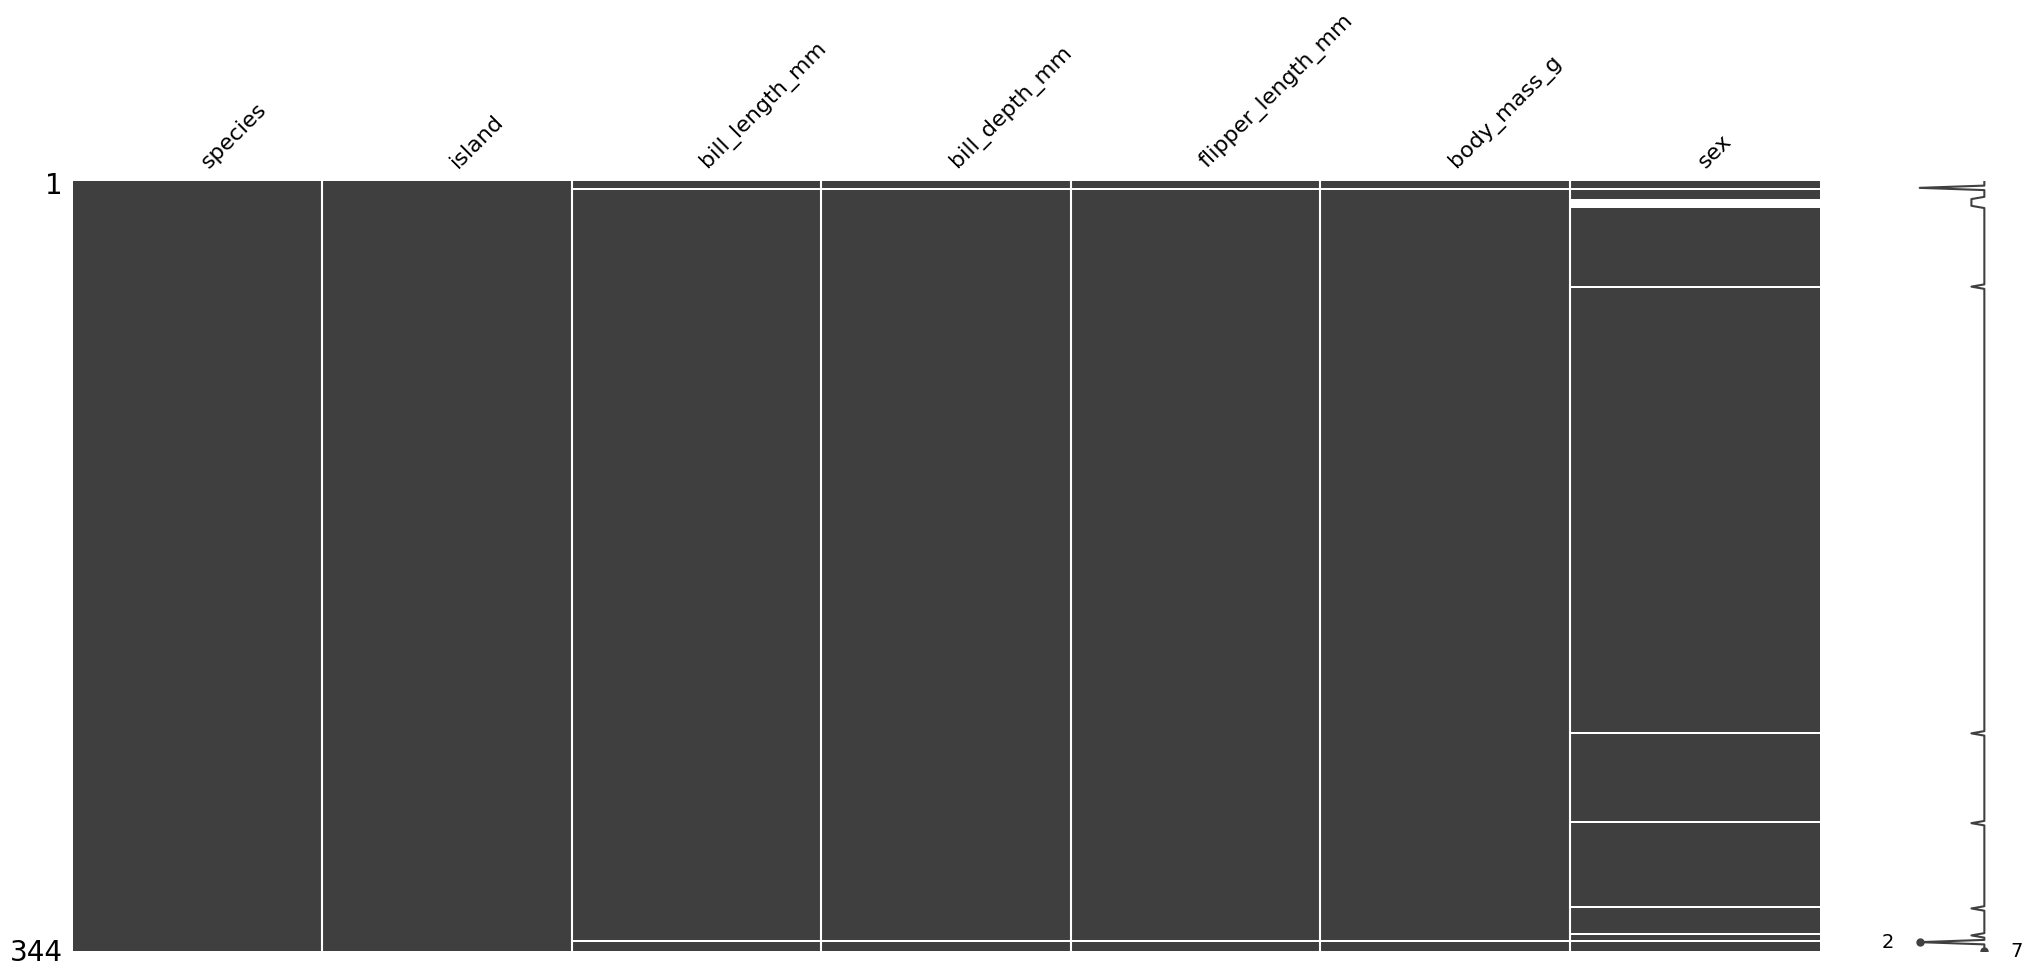

In [73]:
import missingno as msno

msno.matrix(penguins)

In [74]:
penguins.columns

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

In [75]:
penguins.loc[ penguins['bill_length_mm'].isna()]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN


In [76]:
df = penguins.dropna(subset=['bill_length_mm'])
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE


<AxesSubplot: >

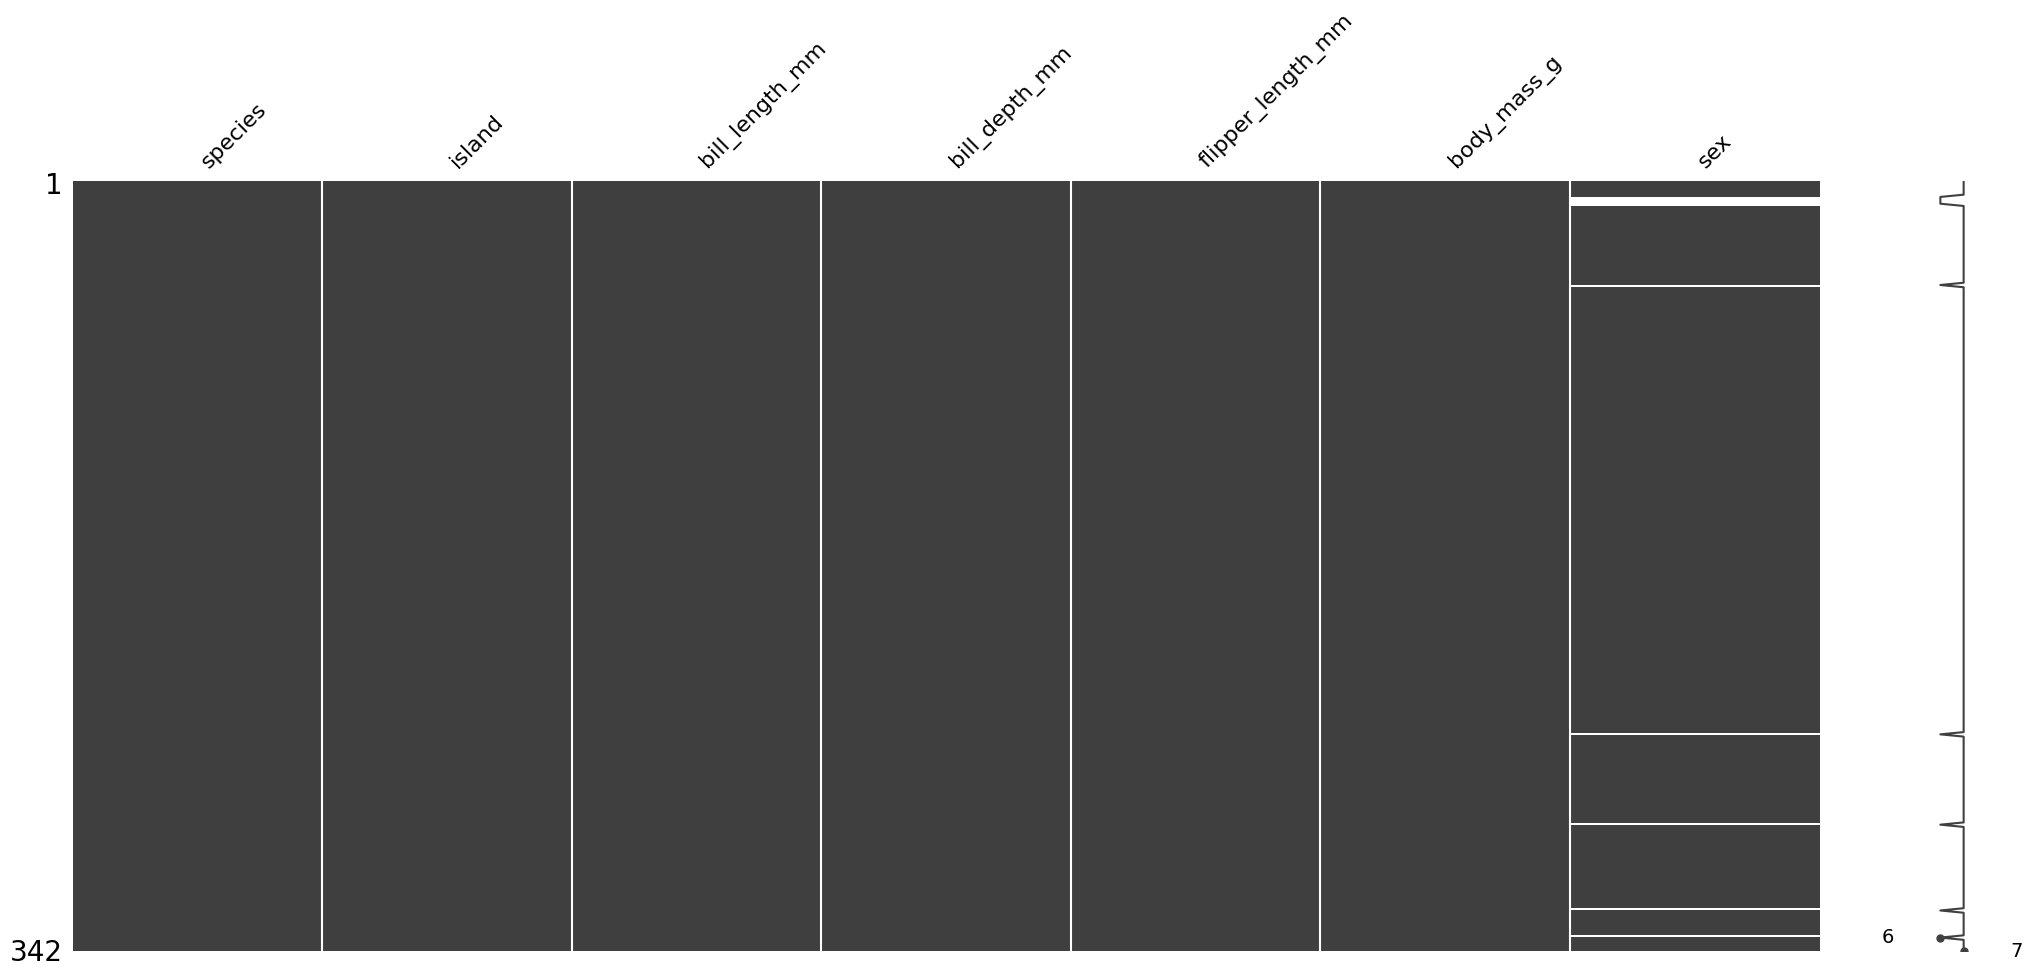

In [77]:
msno.matrix(df)

In [78]:
df['sex'].value_counts()

MALE      168
FEMALE    165
Name: sex, dtype: int64

In [79]:
df['sex'].isna().sum()

9

In [80]:
# df['sex'].fillna('NONE', inplace=True)
df['sex'].fillna('NONE', inplace=True)

C:\Users\kamibot\AppData\Local\Temp\ipykernel_13388\1488614416.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sex'].fillna('NONE', inplace=True)


In [81]:
df['sex'].value_counts()

MALE      168
FEMALE    165
NONE        9
Name: sex, dtype: int64

### 테스트셋 분리

In [82]:
X = df.drop(['species'], axis=1)
y = df['species']

X.head()

,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Torgersen,39.3,20.6,190.0,3650.0,MALE


In [83]:
df['island'].unique()

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

In [84]:
X = df.drop(['species'], axis=1)
y = df['species']

In [85]:
# island, sex 인코딩

# df['island'].map({'Biscoe':0, 'Dream':1, 'Torgersen':2})
# df['sex'].map({'FEMALE':0, 'MALE':1, 'NONE':2})

In [86]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
X['island'] = encoder.fit_transform(X['island'])
X.head()

,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,2,39.1,18.7,181.0,3750.0,MALE
1,2,39.5,17.4,186.0,3800.0,FEMALE
2,2,40.3,18.0,195.0,3250.0,FEMALE
4,2,36.7,19.3,193.0,3450.0,FEMALE
5,2,39.3,20.6,190.0,3650.0,MALE


In [87]:
sex_encoder = LabelEncoder()
X['sex'] = sex_encoder.fit_transform(X['sex'])
X.head()

,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,2,39.1,18.7,181.0,3750.0,1
1,2,39.5,17.4,186.0,3800.0,0
2,2,40.3,18.0,195.0,3250.0,0
4,2,36.7,19.3,193.0,3450.0,0
5,2,39.3,20.6,190.0,3650.0,1


In [88]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                   stratify=y,
                                                   random_state=2022)

print(X_train.shape, X_test.shape)

(273, 6) (69, 6)


In [89]:
type(X_train), type(y_train)

(pandas.core.frame.DataFrame, pandas.core.series.Series)

In [90]:
feature_name = X_train.columns
feature_name

Index(['island', 'bill_length_mm', 'bill_depth_mm', 'flipper_length_mm',
       'body_mass_g', 'sex'],
      dtype='object')

In [91]:
X_train = X_train.values
y_train = y_train.values

In [92]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=30, max_depth=3)
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, n_estimators=30)

In [93]:
clf.score(X_train, y_train)

0.978021978021978

In [94]:
feature_name

Index(['island', 'bill_length_mm', 'bill_depth_mm', 'flipper_length_mm',
       'body_mass_g', 'sex'],
      dtype='object')

In [95]:
clf.feature_importances_

array([0.06147554, 0.3035842 , 0.14041523, 0.34687339, 0.1465996 ,
       0.00105203])

In [96]:
sr = pd.Series(clf.feature_importances_,
         index=feature_name)
sr

island               0.061476
bill_length_mm       0.303584
bill_depth_mm        0.140415
flipper_length_mm    0.346873
body_mass_g          0.146600
sex                  0.001052
dtype: float64

In [97]:
sr = sr.sort_values(ascending=False)
sr

flipper_length_mm    0.346873
bill_length_mm       0.303584
body_mass_g          0.146600
bill_depth_mm        0.140415
island               0.061476
sex                  0.001052
dtype: float64

<AxesSubplot: >

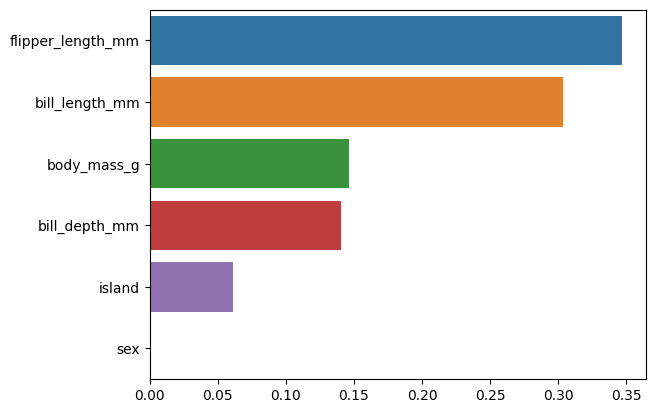

In [98]:
sns.barplot(x=sr, y=sr.index)

### 테스트 데이터 